In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
pfx = '/home/janik/Praktikum_medPhys/dto/patients/Camus/plans/'

In [15]:
import os

In [16]:
plans = sorted(next(os.walk(pfx))[1])
print(plans)

['Ant', 'Ant_colThres_0p1', 'AstarGrad1', 'AstarLF100', 'AstarVoxel', 'AstarVoxel1', 'AstarVoxel2', 'AstarVoxel3', 'AstarVoxel4', 'AstarVoxel5', 'AstarVoxel6', 'AstarVoxel7', 'AstarVoxel8', 'AstarVoxel_17', 'GC1', 'GC2', 'GC2_2', 'GC3', 'GC3_OAR', 'GC3x3', 'HandMade', 'HandMade_EclipseJaw', 'HandMade_FitToStruct', 'HandMade_jawTootight', 'MinCostGT', 'VMAT', 'VoxA_LFreweight', 'VoxA_Logreweight_LF', 'VoxA_OARLF', 'VoxelA_LF100COrth', 'VoxelAstarColliRot', 'VoxelAstarColliRotOrth', 'VoxelAstarOrthCol', 'p1', 'p3']


In [17]:
def ensure_dir(file_path):
    directory = os.path.dirname(file_path)
    if not os.path.exists(directory):
        os.makedirs(directory)

In [18]:
def GetCosts (pfx, plans) :
    costs = []
    for p in plans :
        opt_cost = pfx+'/'+p+'/opt/objectives_cost.txt'
        File = open(opt_cost,'r')
        cost_dict = {}
        for f in File.readlines()[:-1] :
            word = f.split(' = ')
            cost_dict[word[0]] = float(word[1])
        costs.append(cost_dict)
        File.close()
    return costs

In [19]:
plans = ['GC1', 'GC2', 'GC2_2', 'GC3','p3','GC3_OAR']
analysis_name = 'a3'
ref_plan = 'GC1'

In [20]:
costs = GetCosts(pfx=pfx,plans=plans)

In [21]:
df = pd.DataFrame(data=costs)
df['name'] = plans

In [33]:
df['PTV_I.1.1-1']

0    6.009054
1    5.315835
2    6.502720
3    4.318607
4    2.568808
5    1.647333
Name: PTV_I.1.1-1, dtype: float64

In [21]:
# exclude total and name
df2 = df.iloc[:,:-2]

In [22]:
reference = (df[df['name']==ref_plan]['TOTAL'])
reference_id = reference.index[0]
reference = reference.values[0]

print(reference_id)

0


In [23]:
perfect_obj = []
for k in df2.keys() :
    if (np.all(df2[k]==0)) :
        print('objective %s can be fully satisfied'%(k))
        perfect_obj.append(k)


objective Auge_li-4 can be fully satisfied
objective Hirn-6 can be fully satisfied
objective PTV_I.1.1-3 can be fully satisfied


In [24]:
def PlotHbarSummary (dataframe,name,percentage=0.05, saveFlag = False) :
    df = dataframe
    df2 = df.iloc[:,:-2]
    analysis_name = name
    perfect_obj = []
    for k in df2.keys() :
        if (np.all(df2[k]==0)) :
            print('objective %s can be fully satisfied'%(k))
            perfect_obj.append(k)
    df_plot = df2.drop(perfect_obj,axis=1)

    
    plt.figure(figsize=(12,8))

    ax = df_plot.plot(kind='barh',stacked=True,use_index=False,yticks=['a'],figsize=(12,8))
    ax.set_yticklabels(df.name)


    plt.xlabel('cost [a.u.]')
    plt.ylabel('plan name')

    plt.vlines(reference,-0.5,len(df['TOTAL'])-0.5,'r',linestyle='--',label=r'[-180,180] gantry range ($\pm 5 \%$)')
    ax.axvspan(reference*(1.-percentage),reference*(1.+percentage),alpha=0.5,color='red')

    plt.legend(bbox_to_anchor=(1.3,1.01))
    
    if saveFlag :
        save_path = '/home/janik/Praktikum_medPhys/AnalyseOptimizer/plots/'+analysis_name+'/'+'Stacked_BarPlot.png'
        ensure_dir(file_path=save_path)
        plt.savefig(save_path,bbox_inches='tight')
    plt.show()

objective Auge_li-4 can be fully satisfied
objective Hirn-6 can be fully satisfied
objective PTV_I.1.1-3 can be fully satisfied


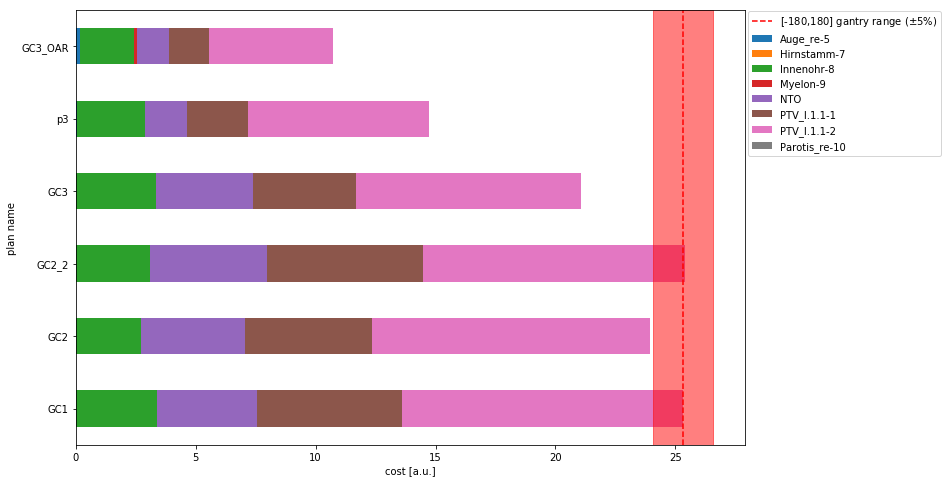

In [25]:
PlotHbarSummary(dataframe=df,name=analysis_name,saveFlag=True)


PTV_I.1.1-2
[11.73559613, 11.5769527, 10.92147069, 9.352655206, 7.547757456, 5.182276304]


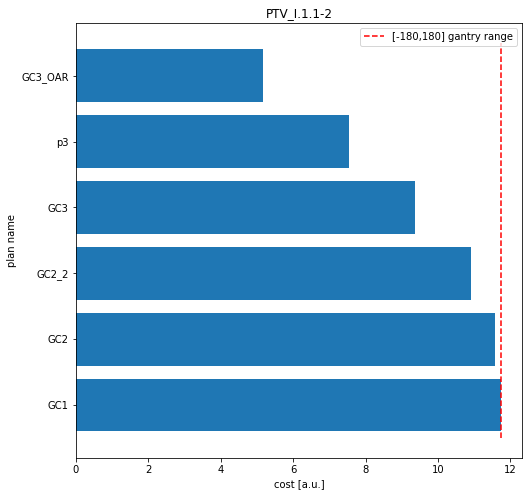

PTV_I.1.1-3
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


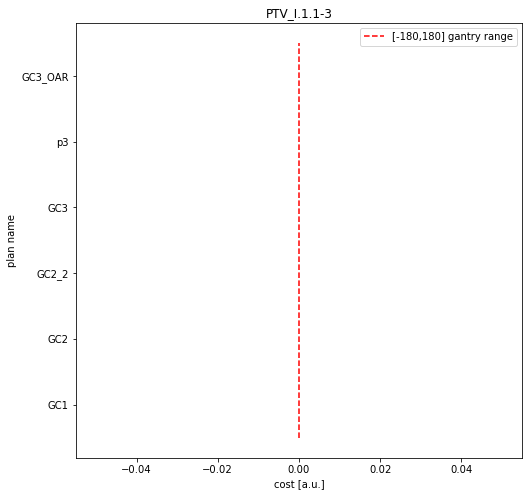

PTV_I.1.1-1
[6.009054188, 5.315835352, 6.502720404, 4.318607125, 2.568808383, 1.647333174]


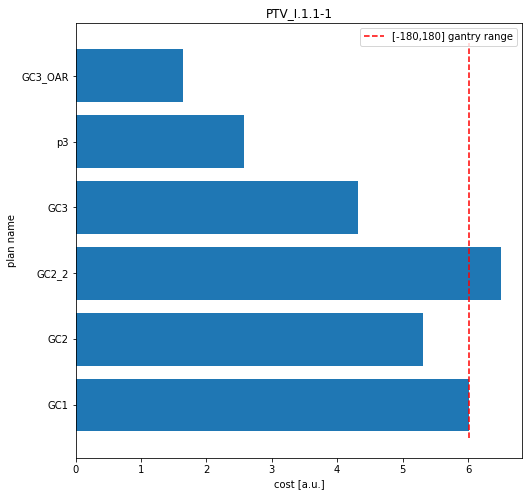

Hirnstamm-7
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0009145737463]


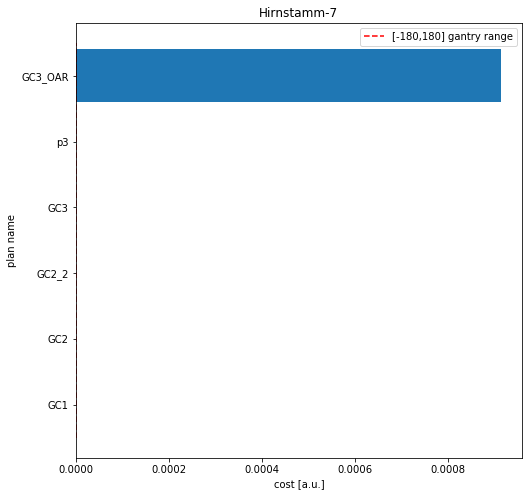

Hirn-6
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


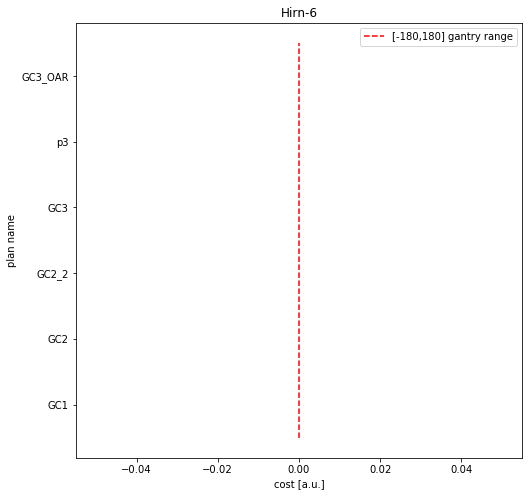

Innenohr-8
[3.401450147, 2.714856574, 3.09268536, 3.332420371, 2.838691645, 2.27742095]


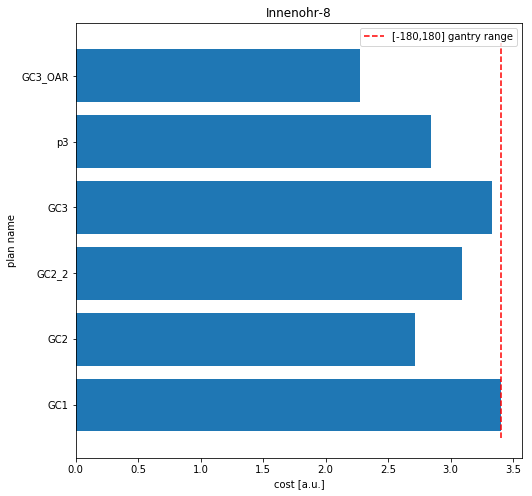

Auge_re-5
[0.005474132659, 0.007393016872, 0.006148029454, 0.01351609377, 0.05543343042, 0.172698246]


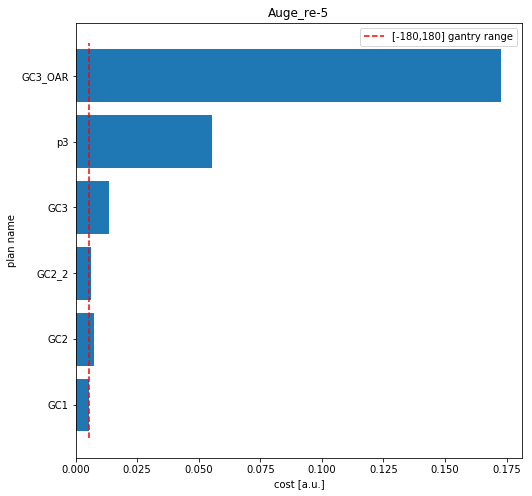

NTO
[4.166114807, 4.32047081, 4.855368614, 4.029779911, 1.729238272, 1.345526099]


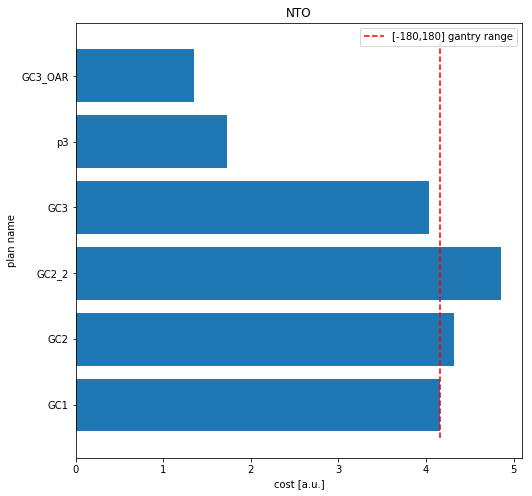

Myelon-9
[0.0, 0.0, 0.0, 0.0, 0.008231528272, 0.1019799033]


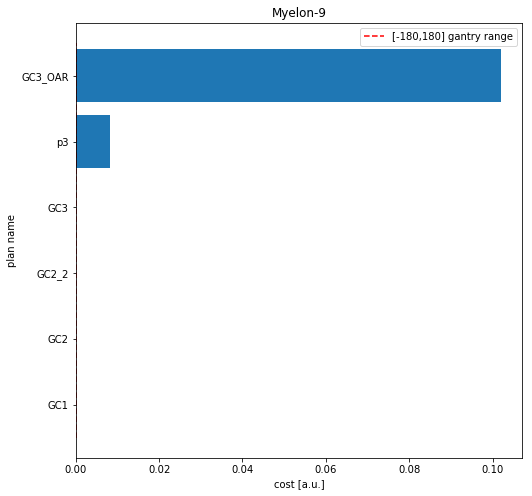

TOTAL
[25.317689404659, 23.935508452872, 25.378393097454, 21.04697870677, 14.748160714692, 10.7306613038393]


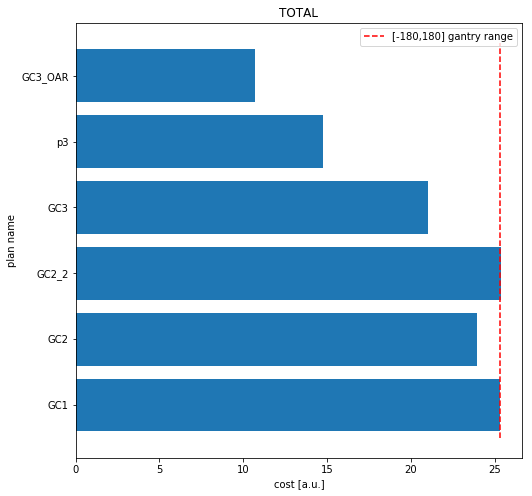

Auge_li-4
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


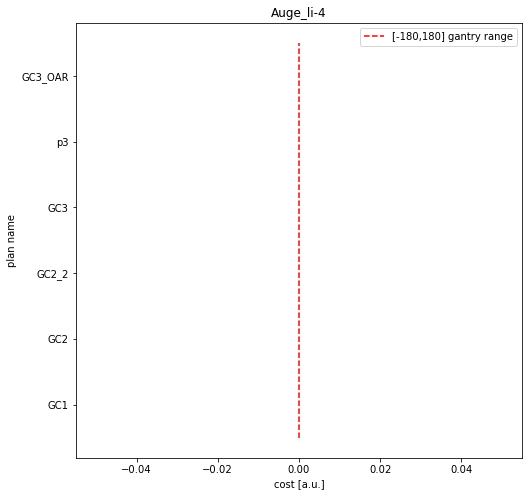

Parotis_re-10
[0.0, 0.0, 0.0, 0.0, 0.0, 0.002512053793]


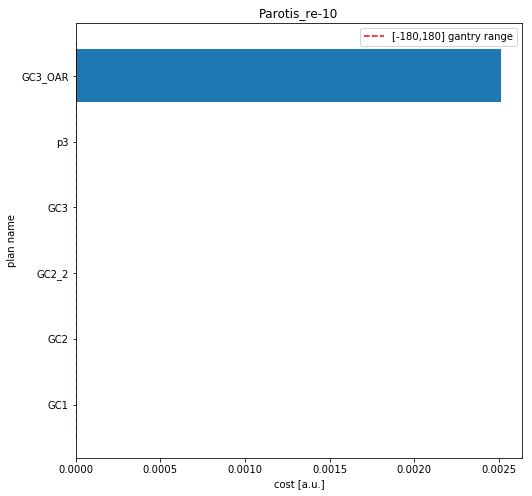

In [26]:
for i, key in enumerate(costs[0].keys()) :
    print(key)
    print([x[key] for x in costs])
    values = [x[key] for x in costs]
    plt.figure(figsize=(8,8))
    plt.title(key)
    
    plt.barh(bottom=np.arange(len(values)),width=values,tick_label=plans)
    plt.vlines(values[reference_id],-0.5,len(values)-0.5,'r',linestyle='--',label='[-180,180] gantry range')
    
    plt.xlabel('cost [a.u.]')
    plt.ylabel('plan name')
    plt.legend(loc='upper right')
    
    save_path = '/home/janik/Praktikum_medPhys/AnalyseOptimizer/plots/'+analysis_name+'/HBar/'+key+'_BarPlot.png'
    ensure_dir(file_path=save_path)

    plt.savefig(save_path,bbox_inches='tight')
    plt.show()

In [27]:
import sys
sys.path.insert(0,'/home/janik/Praktikum_medPhys/FirstSearchAlgos/code/')
import util as ut
import plotting as pl

In [28]:
import imp
imp.reload(pl)
imp.reload(ut)

<module 'util' from '/home/janik/Praktikum_medPhys/FirstSearchAlgos/code/util.pyc'>

('plan', 'GC1')
['t1', 't2', '\n']
('track name ', ['t1', 't2'])
t1
t2


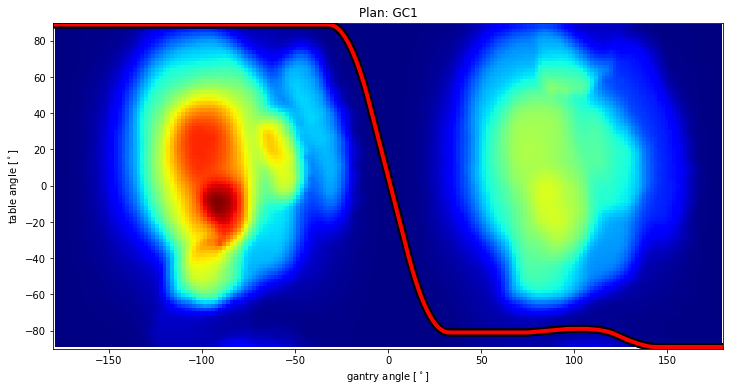

('plan', 'GC2')
['t1', 't2', '\n']
('track name ', ['t1', 't2'])
t1
t2


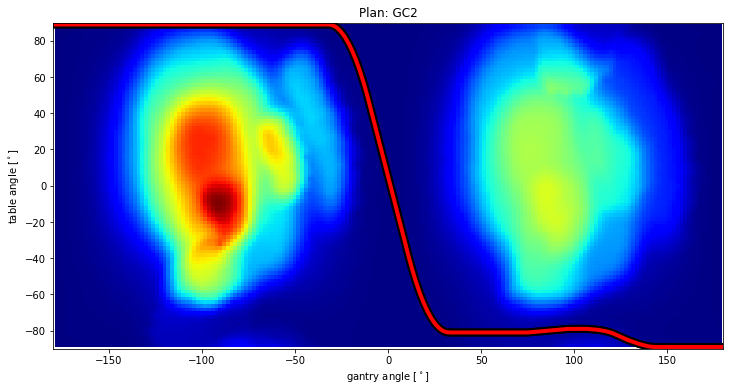

('plan', 'GC2_2')
['t1', 't2', '\n']
('track name ', ['t1', 't2'])
t1
t2


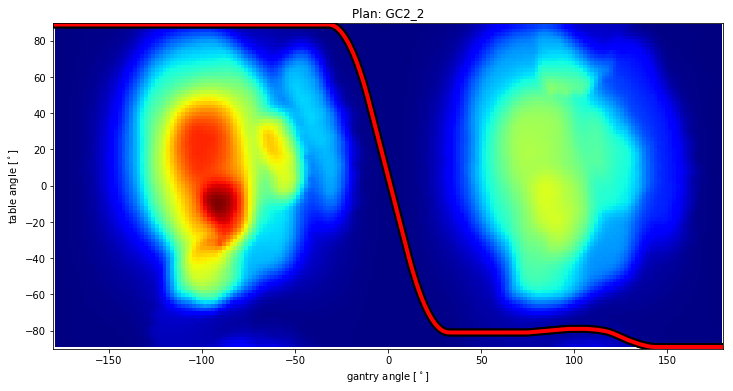

('plan', 'GC3')
['t1', 't2', '\n']
('track name ', ['t1', 't2'])
t1
t2


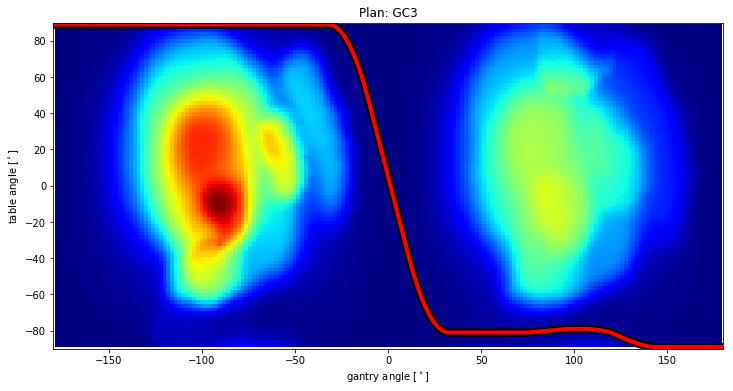

('plan', 'p3')
['t_auge_re', 't_auge_reO', 't_innenohr', 't_innenohrO', 't_tissue', 't_tissueO', '\n']
('track name ', ['t_auge_re', 't_auge_reO', 't_innenohr', 't_innenohrO', 't_tissue', 't_tissueO'])
t_auge_re
t_auge_reO
t_innenohr
t_innenohrO
t_tissue
t_tissueO


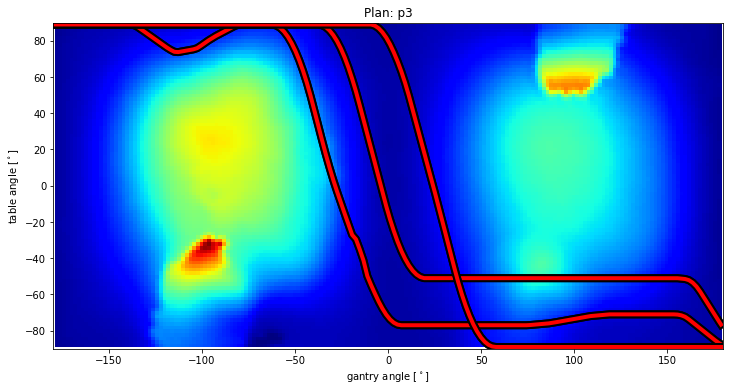

('plan', 'GC3_OAR')
['t_augeRe', 't_augeReOrth', 't_innenohr', 't_innenohrOrth', 't_NTO', 't_NTOorth', '\n']
('track name ', ['t_augeRe', 't_augeReOrth', 't_innenohr', 't_innenohrOrth', 't_NTO', 't_NTOorth'])
t_augeRe
t_augeReOrth
t_innenohr
t_innenohrOrth
t_NTO
t_NTOorth


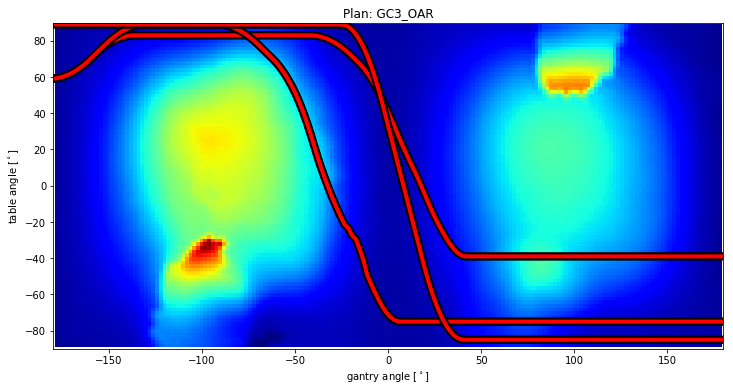

In [29]:
for p in plans :
    print('plan',p)
    File = open(pfx+p+'/plan.txt')
    track_names = (File.readlines()[3].split('=')[1].split(' '))
    print(track_names)
    if '\n' in track_names :
        track_names = list(track_names[:-1])
        if '' in track_names :
            track_names = list(track_names[:-1])
    File.close()
    
    print('track name ',track_names)
    plt.figure(figsize=(12,6))
    for t in track_names :
        print(t)
        if '\n' in t :
            t = t[:-1]
        nFile = open(pfx+p+'/gtc/'+t+'-gtc.txt')

        ga = []
        ta = []
        ca = []
        for f in nFile.readlines()[1:] :
            value = (f.split('\t'))
            ga.append(float(value[0]))
            ta.append(float(value[1]))
            ca.append(float(value[2][:-1]))
            #print((value[2][:-1]))
        nFile.close()

        plt.plot(ga,ta,'k',lw=8)
        plt.plot(ga,ta,'r',lw=4)

    dim, gga, tta, col_map = ut.load3DColorwash(path=pfx+'/'+p+'/gt-maps/'+t+'-map.txt')
    X,Y = np.meshgrid(gga,tta)
    plt.pcolor(X,Y,col_map,cmap='jet')
    plt.ylim(-90,90)
    plt.xlim(-180,180)
    plt.title('Plan: '+p)
    plt.xlabel(r'gantry angle [${}^\circ$]')
    plt.ylabel(r'table angle [${}^\circ$]')

    save_path = '/home/janik/Praktikum_medPhys/AnalyseOptimizer/plots/'+analysis_name+'/Track/'+p+'_Track.png'
    ensure_dir(file_path=save_path)

    plt.savefig(save_path,bbox_inches='tight')
    plt.show()